# Dart: Sci-kit learn for Time Series Analysis

Darts in not inbuilt, so install it using "*pip install u8darts"*

In [2]:
import pandas as pd
from darts import TimeSeries

Like pandas has DataFrame, Similarly, Darts has TimeSeries

In [4]:
df = pd.read_csv('AirPassengers.csv')

Series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')

This timeseries is univariate, containing only one variable.

In [5]:
df.head()

,Month,#Passengers
0,2009-01,112
1,2009-02,118
2,2009-03,132
3,2009-04,129
4,2009-05,121


## Splitting the series into training and validation TimeSeries

In [7]:

train, val = Series.split_before(pd.Timestamp('20180101'))

## Models

## All the time series models:
* Exponential smoothing,
* ARIMA & auto-ARIMA,
* Facebook Prophet,
* Theta method,
* FFT (Fast Fourier Transform),
* Recurrent neural networks (vanilla RNNs, GRU, and LSTM variants),
* Temporal Convolutional Networks (TCN),
* and several naive baselines.

In [8]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

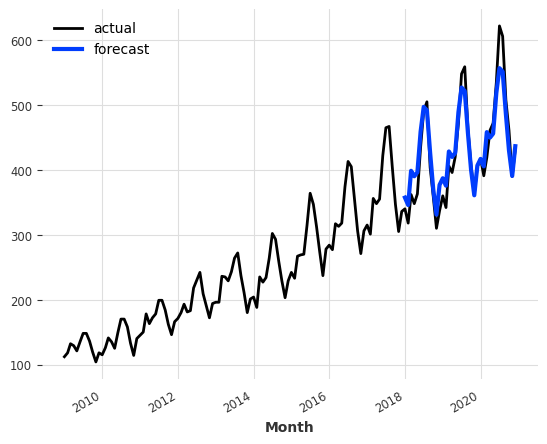

In [9]:
import matplotlib.pyplot as plt

Series.plot(label = 'actual')
prediction.plot(label = 'forecast', lw = 3)
plt.legend()

In [10]:
from darts.models import AutoARIMA

model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

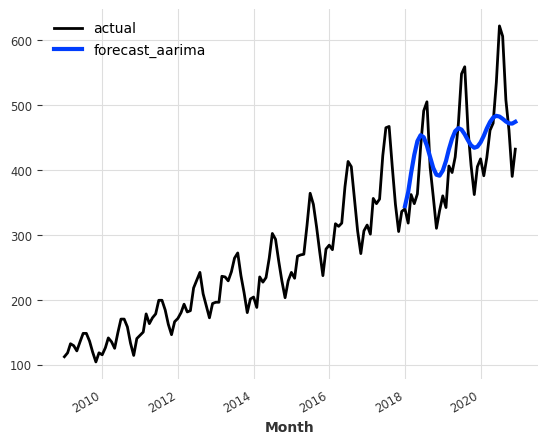

In [11]:
Series.plot(label = 'actual')
prediction_aarima.plot(label = 'forecast_aarima', lw = 3)
plt.legend()

In [12]:
from darts.models import FFT

model_fft = FFT()
model_fft.fit(train)
prediction_fft = model_fft.predict(len(val))

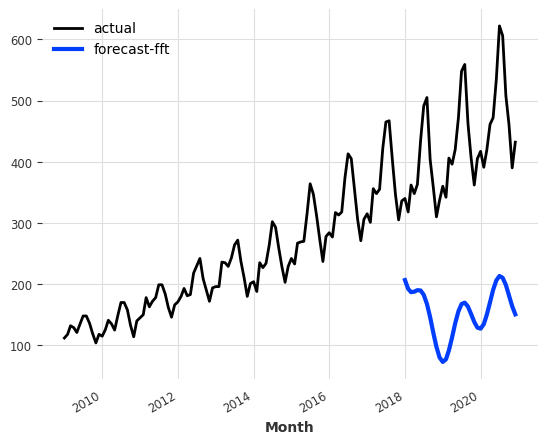

In [13]:
Series.plot(label = 'actual')
prediction_fft.plot(label = 'forecast-fft', lw = 3)
plt.legend()

In [14]:
# facebook prophet model
from darts.models import Prophet

model_prophet = Prophet()
model_prophet.fit(train)
prediction_prophet = model_prophet.predict(len(val))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


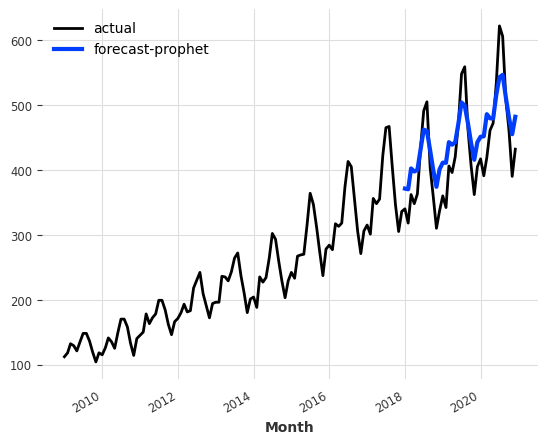

In [15]:
Series.plot(label = 'actual')
prediction_prophet.plot(label = 'forecast-prophet', lw = 3)
plt.legend()

# Backtesting